# Github URL：
**https://github.com/william25885/Computational_Biology_HW.git**

# Introduction & Setup

#### **Briefly describe the purpose of this analysis (NHANES data, 2021–2023).**
- It aims to assess health indicator distributions among US adults, with particular focus on impacts of socioeconomic factors on health, and ensure quality and reliability of measurement data, providing scientific evidence for public health decision-making.

### **Load all required packages and datasets.**
- Please refer in detail to the first and second code blocks of Week 5 and Week 6.

# Week 5

## Q1. Among adults aged ≥20 years in the 2021–2023 NHANES, observe the association between BMI and mean systolic blood pressure (SBP) and does the association vary between sex ?

### I. Install & load the related packages && font


In [1]:
options(device = "png", bitmapType = "cairo")

install.packages(
  c("tidyverse","haven","janitor","stringr"
  ,"scales","skimr","naniar","ggplot2","showtext","gridExtra",
  "showtext", "sysfonts", "showtextdb"),
  repos = "https://cran.csie.ntu.edu.tw/",   # 台灣 NTU CRAN 鏡像，速度快
  dependencies = TRUE
)

# 創建輸出資料夾
dir.create("outputs", showWarnings = FALSE)


下載的二進位程式套件在
	/var/folders/59/tx1m33l955b0h85n6dlwm4440000gn/T//Rtmpij6kT8/downloaded_packages 裡


In [2]:
library(tidyverse)
library(haven)
library(janitor)
library(stringr)
library(scales)
library(skimr)
library(naniar)
library(showtext)
library(sysfonts)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.1     ✔ stringr   1.5.2
✔ ggplot2   4.0.0     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

載入套件：‘janitor’


下列物件被遮斷自 ‘package:stats’:

    chisq.test, fisher.test



載入套件：‘scales’


下列物件被遮斷自 ‘package:purrr’:

    discard


下列物件被遮斷自 ‘package:readr’:

    col_factor



載入套件：‘naniar’


下列物件被遮斷自 ‘package:skimr’:

    n_complete


載入需要的套件：sysfonts

載入需要的套件：showtextdb



In [3]:
system_fonts <- list.files("/System/Library/Fonts", full.names = TRUE)
print(system_fonts)


 [1] "/System/Library/Fonts/ADTNumeric.ttc"                  
 [2] "/System/Library/Fonts/Apple Braille Outline 6 Dot.ttf" 
 [3] "/System/Library/Fonts/Apple Braille Outline 8 Dot.ttf" 
 [4] "/System/Library/Fonts/Apple Braille Pinpoint 6 Dot.ttf"
 [5] "/System/Library/Fonts/Apple Braille Pinpoint 8 Dot.ttf"
 [6] "/System/Library/Fonts/Apple Braille.ttf"               
 [7] "/System/Library/Fonts/Apple Color Emoji.ttc"           
 [8] "/System/Library/Fonts/Apple Symbols.ttf"               
 [9] "/System/Library/Fonts/AppleSDGothicNeo.ttc"            
[10] "/System/Library/Fonts/AquaKana.ttc"                    
[11] "/System/Library/Fonts/ArialHB.ttc"                     
[12] "/System/Library/Fonts/Avenir Next Condensed.ttc"       
[13] "/System/Library/Fonts/Avenir Next.ttc"                 
[14] "/System/Library/Fonts/Avenir.ttc"                      
[15] "/System/Library/Fonts/CJKSymbolsFallback.ttc"          
[16] "/System/Library/Fonts/Courier.ttc"                     
[17] "/S

In [4]:
font_add("Heiti", regular = "/System/Library/Fonts/STHeiti Light.ttc")
showtext_auto()
theme_set(theme_gray(base_family = "Heiti"))

In [5]:
options(warn = -1)

### II. Read the raw data files and quick view to the datasets


In [11]:
# 讀取原始數據檔案
demo <- read_xpt("DEMO_L.xpt")
bpx <- read_xpt("BPXO_L.xpt")
bmx <- read_xpt("BMX_L.xpt")

# 如果 janitor 可用則清理欄位名稱，否則手動處理
if (require(janitor, quietly = TRUE)) {
  demo <- demo %>% clean_names()
  bpx <- bpx %>% clean_names()
  bmx <- bmx %>% clean_names()
} else {
  # 清理欄位名稱（轉小寫，替換特殊字符）
  names(demo) <- tolower(gsub("[^a-zA-Z0-9]", "_", names(demo)))
  names(bpx) <- tolower(gsub("[^a-zA-Z0-9]", "_", names(bpx)))
  names(bmx) <- tolower(gsub("[^a-zA-Z0-9]", "_", names(bmx)))
}

cat("\n=== Demo: ===\n")
print(demo, width = Inf, n = 10)

cat("\n=== BPX: ===\n")
print(bpx, width = Inf, n = 10)

cat("\n=== BMX: ===\n")
print(bmx, width = Inf, n = 10)



=== Demo: ===
# A tibble: 11,933 × 27
     seqn sddsrvyr ridstatr riagendr ridageyr ridagemn ridreth1 ridreth3
    <dbl>    <dbl>    <dbl>    <dbl>    <dbl>    <dbl>    <dbl>    <dbl>
 1 130378       12        2        1       43       NA        5        6
 2 130379       12        2        1       66       NA        3        3
 3 130380       12        2        2       44       NA        2        2
 4 130381       12        2        2        5       NA        5        7
 5 130382       12        2        1        2       NA        3        3
 6 130383       12        1        2        3       NA        2        2
 7 130384       12        1        1       43       NA        1        1
 8 130385       12        1        2       65       NA        3        3
 9 130386       12        2        1       34       NA        1        1
10 130387       12        2        2       68       NA        3        3
   ridexmon ridexagm dmqmiliz dmdborn4 dmdyrusr dmdeduc2 dmdmartz ridexprg
      <dbl

收縮壓欄位: bpxosy1 bpxosy2 bpxosy3 
舒張壓欄位: bpxodi1 bpxodi2 bpxodi3 


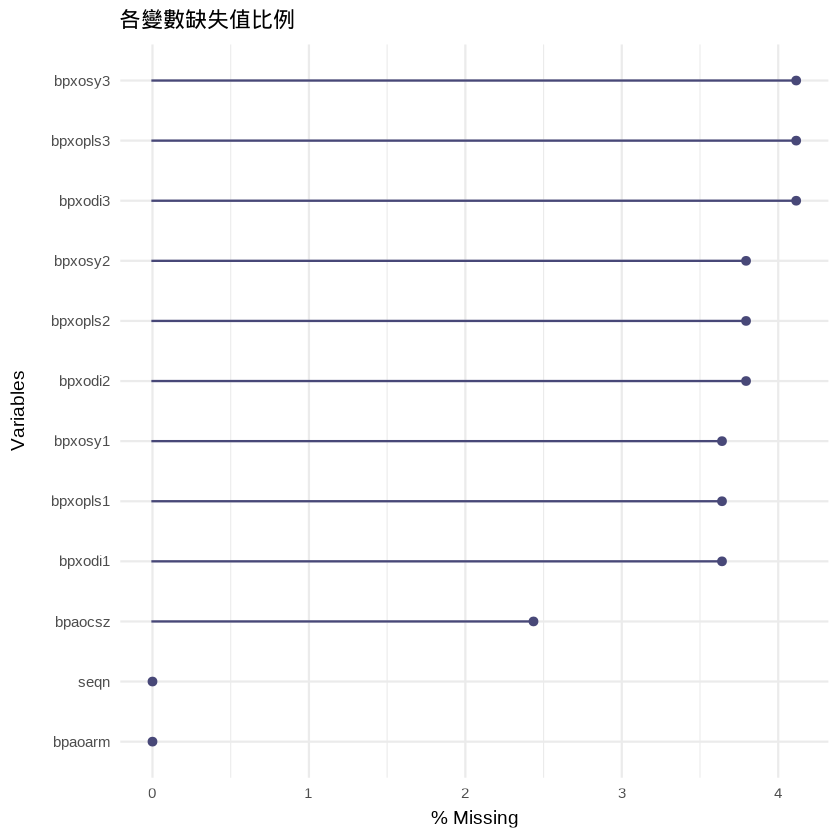

In [12]:
# 檢查血壓測量欄位
sbp_cols <- names(bpx)[stringr::str_detect(names(bpx), "^bpxo?sy[1-3]$")]
dbp_cols <- names(bpx)[stringr::str_detect(names(bpx), "^bpxo?di[1-3]$")]

cat("收縮壓欄位:", sbp_cols, "\n")
cat("舒張壓欄位:", dbp_cols, "\n")

# 缺失值分析
if (require(naniar, quietly = TRUE)) {
  # 使用 naniar 套件進行缺失值視覺化
  gg_miss_var(bpx, show_pct = TRUE) +
    theme_minimal(base_size = 14) +
    labs(title = "各變數缺失值比例")
} else {
  # 手動計算缺失值比例
  cat("\n=== 各變數缺失值比例 ===\n")
  missing_pct <- colMeans(is.na(bpx)) * 100
  missing_df <- data.frame(
    variable = names(bpx),
    missing_pct = round(missing_pct, 2)
  ) %>%
    arrange(desc(missing_pct))
  
  print(missing_df)
}


### III. Find out the targeted column from datasets for this question and define them && 
### IV. Build the original variables (including checking the coding correctness) and dataset for constructing plots before cleaning

**Q1**：Among adults aged ≥20 years in the 2021–2023 NHANES, observe the association between BMI and mean systolic blood pressure (SBP) and does the association vary between sex ?

#### targeted column：

1. **Age** - 來自 DEMO_L.xpt
   - 用於篩選 ≥20 歲的成人

2. **Sex** - 來自 DEMO_L.xpt  
   - 用於分析關聯是否因性別而異

3. **BMI (Body Mass Index)** - 來自 BMX_L.xpt
   - 身體質量指數，主要分析變數

4. **SBP (Systolic Blood Pressure)** - 來自 BPXO_L.xpt
   - 收縮壓測量值，用於計算平均收縮壓


In [40]:
# 查看各數據集的欄位結構
cat("=== DEMO_L.xpt 欄位 ===\n")
print(names(demo))

cat("\n=== BMX_L.xpt 欄位 ===\n")
print(names(bmx))

cat("\n=== BPXO_L.xpt 欄位 ===\n")
print(names(bpx))


=== DEMO_L.xpt 欄位 ===
 [1] "seqn"     "sddsrvyr" "ridstatr" "riagendr" "ridageyr" "ridagemn"
 [7] "ridreth1" "ridreth3" "ridexmon" "ridexagm" "dmqmiliz" "dmdborn4"
[13] "dmdyrusr" "dmdeduc2" "dmdmartz" "ridexprg" "dmdhhsiz" "dmdhrgnd"
[19] "dmdhragz" "dmdhredz" "dmdhrmaz" "dmdhsedz" "wtint2yr" "wtmec2yr"
[25] "sdmvstra" "sdmvpsu"  "indfmpir"

=== BMX_L.xpt 欄位 ===
 [1] "seqn"     "bmdstats" "bmxwt"    "bmiwt"    "bmxrecum" "bmirecum"
 [7] "bmxhead"  "bmihead"  "bmxht"    "bmiht"    "bmxbmi"   "bmdbmic" 
[13] "bmxleg"   "bmileg"   "bmxarml"  "bmiarml"  "bmxarmc"  "bmiarmc" 
[19] "bmxwaist" "bmiwaist" "bmxhip"   "bmihip"  

=== BPXO_L.xpt 欄位 ===
 [1] "seqn"     "bpaoarm"  "bpaocsz"  "bpxosy1"  "bpxodi1"  "bpxosy2" 
 [7] "bpxodi2"  "bpxosy3"  "bpxodi3"  "bpxopls1" "bpxopls2" "bpxopls3"


In [41]:
# 4) Build BEFORE (raw) variables and dataset ------------------------------------------
bmi_raw <- bmx %>%
  transmute(seqn, bmi_raw = bmxbmi) 

# SBP data from BPX
sbp_data <- bpx %>%
  select(seqn, all_of(sbp_cols)) %>%
  mutate(
    sbp_mean = rowMeans(select(., all_of(sbp_cols)), na.rm = TRUE),
    sbp_mean = ifelse(is.nan(sbp_mean), NA_real_, sbp_mean)
  ) %>%
  select(seqn, sbp_mean)

table(demo$riagendr)

demo <- demo %>%
  mutate(riagendr = as.numeric(riagendr)) %>%       
  filter(is.na(riagendr) | riagendr %in% c(1, 2))   

demo_sex <- demo %>%
  transmute(seqn, age = ridageyr,
            sex = factor(riagendr, levels=c(1,2), labels=c("Male","Female")))

dat_raw <- demo_sex %>%
  left_join(bmi_raw, by="seqn") %>%
  left_join(sbp_data, by="seqn") %>%  
  filter(age >= 20) %>%
  mutate(
    bmi_raw = ifelse(is.nan(bmi_raw), NA_real_, bmi_raw), 
    sbp_mean = ifelse(is.nan(sbp_mean), NA_real_, sbp_mean)
  )

cat("整合後數據集維度:", dim(dat_raw), "\n")
cat("欄位名稱:", names(dat_raw), "\n")
head(dat_raw, 5)



   1    2 
5575 6358 

整合後數據集維度: 7809 5 
欄位名稱: seqn age sex bmi_raw sbp_mean 


seqn,age,sex,bmi_raw,sbp_mean
<dbl>,<dbl>,<fct>,<dbl>,<dbl>
130378,43,Male,27.0,132.6667
130379,66,Male,33.5,117.0000
130380,44,Female,29.7,109.0000
130384,43,Male,NA,NA
130385,65,Female,NA,NA


### V. Draw the raw data boxplots of BMI & mean SBP separately

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


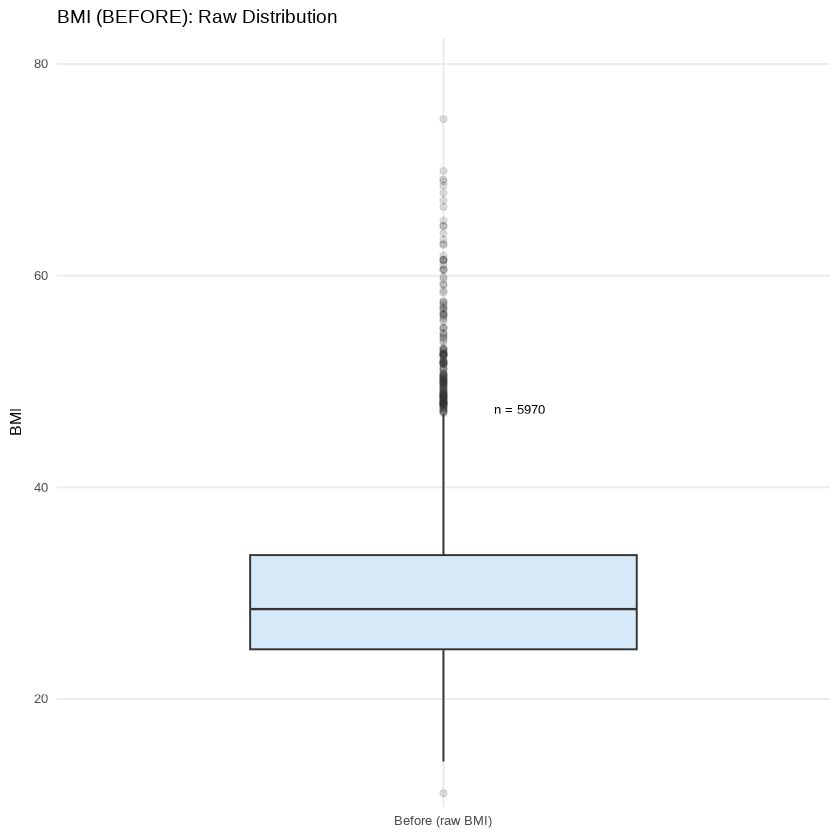

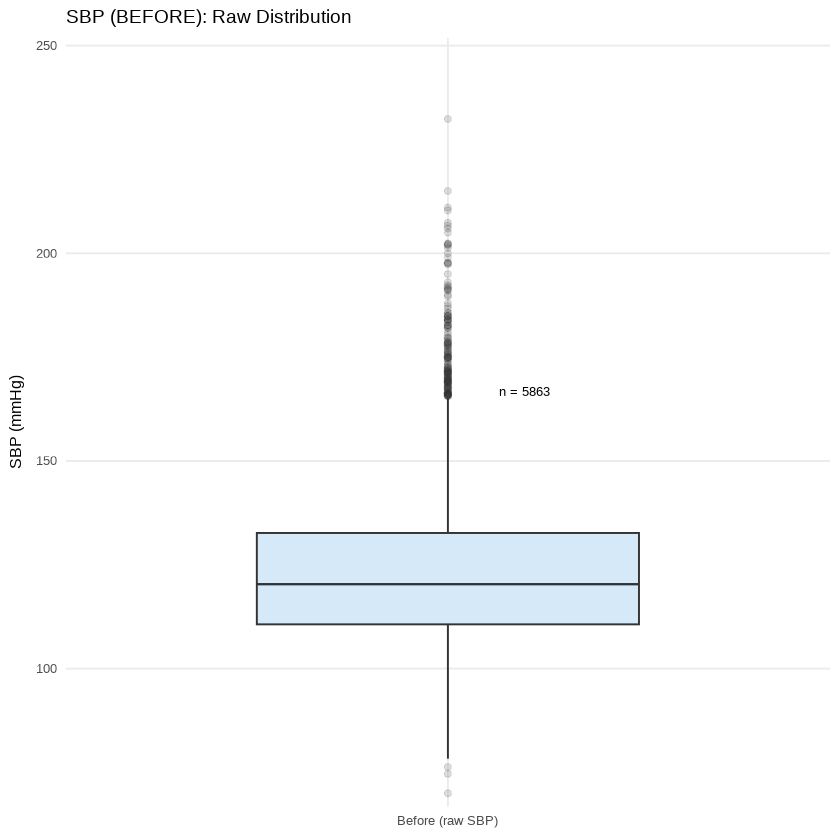

In [16]:
# 5) Draw BEFORE plots ---------------------------------------------------------------------
# ---- BMI boxplot (BEFORE) ----
bmi_before_df <- dat_raw %>% transmute(stage = "Before (raw BMI)", value = bmi_raw)
x <- bmi_before_df$value
qs <- quantile(x, c(.25,.75), na.rm = TRUE)  # na.rm=TRUE to ignore missing values
iqr <- qs[2]-qs[1]
upper_whisker <- min(max(x, na.rm = TRUE), qs[2] + 1.5*iqr)  # upper whisker position, Q3 + 1.5×IQR, capped by max value.
bmi_before_label_y <- upper_whisker + 0.05*iqr
bmi_before_N <- sum(!is.na(x))   # count of non-missing values, !is.na() means "not NA"

p_bmi_before <- ggplot(bmi_before_df, aes(stage, value, fill = stage)) +
  geom_boxplot(width = 0.6, outlier.alpha = 0.15, fatten = 1.2) +
  geom_text(data = tibble(stage="Before (raw BMI)", y=bmi_before_label_y, N=bmi_before_N),
            aes(stage, y, label=paste0("n = ", N)), hjust = -1, size = 3.5, inherit.aes = FALSE) +
  scale_fill_manual(values = c("Before (raw BMI)" = "#D6E9F8")) +
  labs(title = "BMI (BEFORE): Raw Distribution", x = NULL, y = "BMI") +
  scale_y_continuous(expand = expansion(mult = c(0.02, 0.12))) +
  theme_minimal(base_size = 12) + theme(legend.position = "none", panel.grid.minor = element_blank())
ggsave("outputs/q1_box_bmi_before.png", p_bmi_before, bg = "white")

# ---- SBP boxplot (BEFORE) ----
sbp_before_df <- dat_raw %>% transmute(stage = "Before (raw SBP)", value = sbp_mean)
x <- sbp_before_df$value
qs <- quantile(x, c(.25,.75), na.rm = TRUE)
iqr <- qs[2]-qs[1]
upper_whisker <- min(max(x, na.rm = TRUE), qs[2] + 1.5*iqr)
sbp_before_label_y <- upper_whisker + 0.05*iqr
sbp_before_N <- sum(!is.na(x))

p_sbp_before <- ggplot(sbp_before_df, aes(stage, value, fill = stage)) +
  geom_boxplot(width = 0.6, outlier.alpha = 0.15, fatten = 1.2) +
  geom_text(data = tibble(stage="Before (raw SBP)", y=sbp_before_label_y, N=sbp_before_N),
            aes(stage, y, label=paste0("n = ", N)), hjust = -1, size = 3.5, inherit.aes = FALSE) +
  scale_fill_manual(values = c("Before (raw SBP)" = "#D6E9F8")) +
  labs(title = "SBP (BEFORE): Raw Distribution", x = NULL, y = "SBP (mmHg)") +
  scale_y_continuous(expand = expansion(mult = c(0.02, 0.12))) +
  theme_minimal(base_size = 12) + theme(legend.position = "none", panel.grid.minor = element_blank())
ggsave("outputs/q1_box_sbp_before.png", p_sbp_before, bg = "white")

# 顯示圖表
print(p_bmi_before)
print(p_sbp_before)


### VI. Outlier cleaning

In [17]:
# BMI 異常值清理
BMI_LO <- 10; BMI_HI <- 80
bmi_clean <- bmx %>%
  transmute(seqn, bmxbmi) %>%
  mutate(
    q1 = quantile(bmxbmi, 0.25, na.rm=TRUE),
    q3 = quantile(bmxbmi, 0.75, na.rm=TRUE),
    iqr = q3 - q1,
    lo_iqr = q1 - 1.5*iqr,
    hi_iqr = q3 + 1.5*iqr,
    med = median(bmxbmi, na.rm=TRUE),
    madv = mad(bmxbmi, na.rm=TRUE),
    z = ifelse(madv > 0, (bmxbmi - med)/(madv*1.4826), 0),  # 1.4826 to make it comparable to SD if normal
    flag = (bmxbmi < BMI_LO | bmxbmi > BMI_HI) | (bmxbmi < lo_iqr | bmxbmi > hi_iqr) | (abs(z) > 3.5),  # flag outliers
    bmxbmi_clean = ifelse(flag, NA_real_, bmxbmi)
  ) %>% select(seqn, bmxbmi_clean)

# SBP 異常值清理
SBP_LO <- 70; SBP_HI <- 260
sbp_clean <- sbp_data %>%
  transmute(seqn, sbp_mean) %>%
  mutate(
    q1 = quantile(sbp_mean, 0.25, na.rm=TRUE),
    q3 = quantile(sbp_mean, 0.75, na.rm=TRUE),
    iqr = q3 - q1,
    lo_iqr = q1 - 1.5*iqr,
    hi_iqr = q3 + 1.5*iqr,
    med = median(sbp_mean, na.rm=TRUE),
    madv = mad(sbp_mean, na.rm=TRUE),
    z = ifelse(madv > 0, (sbp_mean - med)/(madv*1.4826), 0),  # 1.4826 to make it comparable to SD if normal
    flag = (sbp_mean < SBP_LO | sbp_mean > SBP_HI) | (sbp_mean < lo_iqr | sbp_mean > hi_iqr) | (abs(z) > 3.5),  # flag outliers
    sbp_mean_clean = ifelse(flag, NA_real_, sbp_mean)
  ) %>% select(seqn, sbp_mean_clean)


### VII. Build AFTER cleaning datasets

In [19]:
# 7) Build AFTER (clean) dataset --------------------------------------------------------
dat_clean <- demo_sex %>%
  left_join(bmi_clean, by="seqn") %>%
  left_join(sbp_clean, by="seqn") %>%
  filter(age >= 20) %>%
  mutate(
    bmxbmi_clean = ifelse(is.nan(bmxbmi_clean), NA_real_, bmxbmi_clean),  # normalize NaN to NA
    sbp_mean_clean = ifelse(is.nan(sbp_mean_clean), NA_real_, sbp_mean_clean)
  )

cat("清理後數據集維度:", dim(dat_clean), "\n")
head(dat_clean, 5)


清理後數據集維度: 7809 5 


seqn,age,sex,bmxbmi_clean,sbp_mean_clean
<dbl>,<dbl>,<fct>,<dbl>,<dbl>
130378,43,Male,27.0,132.6667
130379,66,Male,33.5,117.0000
130380,44,Female,29.7,109.0000
130384,43,Male,NA,NA
130385,65,Female,NA,NA


### VIII. Draw the cleaned data boxplots of BMI & mean SBP

In [20]:
# ---- BMI boxplot (AFTER) ----
bmi_after_df <- dat_clean %>% transmute(stage = "After (clean BMI)", value = bmxbmi_clean)
x <- bmi_after_df$value
qs <- quantile(x, c(.25,.75), na.rm = TRUE); 
iqr <- qs[2]-qs[1]
upper_whisker <- min(max(x, na.rm = TRUE), qs[2] + 1.5*iqr)
bmi_after_label_y <- upper_whisker + 0.05*iqr
bmi_after_N <- sum(!is.na(x))

p_bmi_after <- ggplot(bmi_after_df, aes(stage, value, fill = stage)) +
  geom_boxplot(width = 0.6, outlier.alpha = 0.15, fatten = 1.2) +
  geom_text(data = tibble(stage="After (clean BMI)", y=bmi_after_label_y, N=bmi_after_N),
            aes(stage, y, label=paste0("n = ", N)), hjust = -1, size = 3.5, inherit.aes = FALSE) +
  scale_fill_manual(values = c("After (clean BMI)" = "#FCE5CD")) +
  labs(title = "BMI (AFTER): Cleaned Distribution", x = NULL, y = "BMI") +
  scale_y_continuous(expand = expansion(mult = c(0.02, 0.12))) +
  theme_minimal(base_size = 12) + theme(legend.position = "none", panel.grid.minor = element_blank())
ggsave("outputs/q1_box_bmi_after.png", p_bmi_after, bg = "white")


Saving 6.67 x 6.67 in image


Saving 6.67 x 6.67 in image


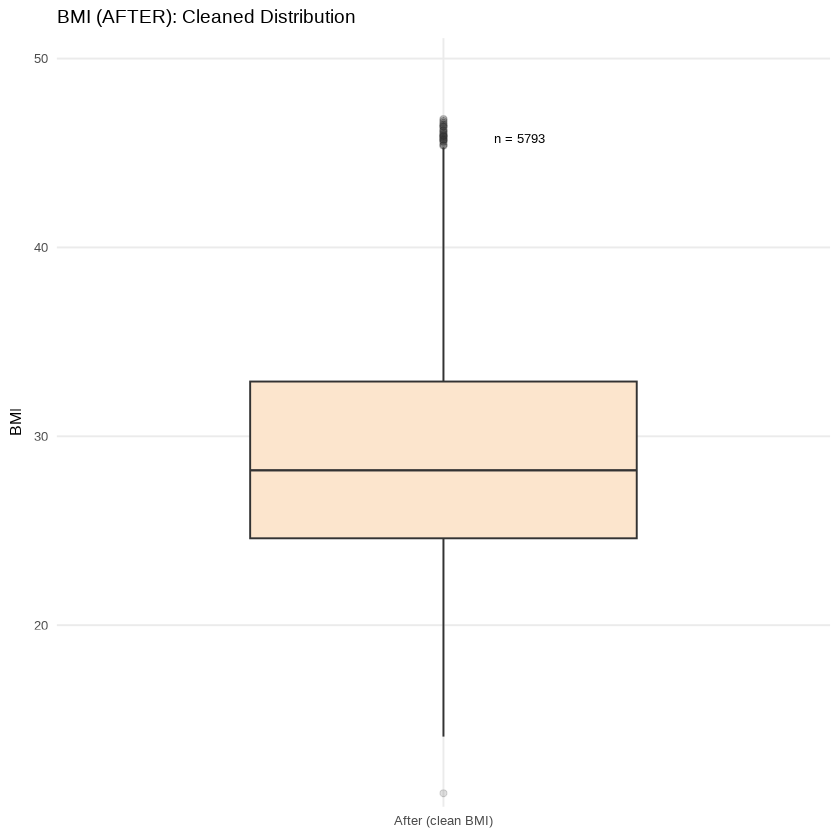

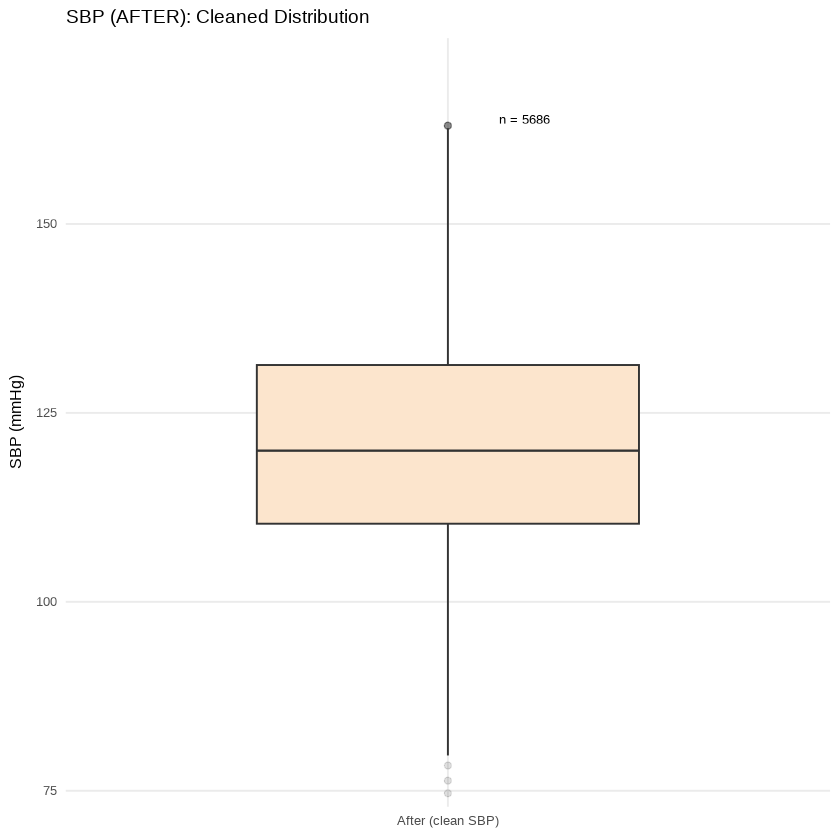

In [21]:
# ---- SBP boxplot (AFTER) ----
sbp_after_df <- dat_clean %>% transmute(stage = "After (clean SBP)", value = sbp_mean_clean)
x <- sbp_after_df$value
qs <- quantile(x, c(.25,.75), na.rm = TRUE); 
iqr <- qs[2]-qs[1]
upper_whisker <- min(max(x, na.rm = TRUE), qs[2] + 1.5*iqr)
sbp_after_label_y <- upper_whisker + 0.05*iqr
sbp_after_N <- sum(!is.na(x))

p_sbp_after <- ggplot(sbp_after_df, aes(stage, value, fill = stage)) +
  geom_boxplot(width = 0.6, outlier.alpha = 0.15, fatten = 1.2) +
  geom_text(data = tibble(stage="After (clean SBP)", y=sbp_after_label_y, N=sbp_after_N),
            aes(stage, y, label=paste0("n = ", N)), hjust = -1, size = 3.5, inherit.aes = FALSE) +
  scale_fill_manual(values = c("After (clean SBP)" = "#FCE5CD")) +
  labs(title = "SBP (AFTER): Cleaned Distribution", x = NULL, y = "SBP (mmHg)") +
  scale_y_continuous(expand = expansion(mult = c(0.02, 0.12))) +
  theme_minimal(base_size = 12) + theme(legend.position = "none", panel.grid.minor = element_blank())
ggsave("outputs/q1_box_sbp_after.png", p_sbp_after, bg = "white")

# 顯示圖表
print(p_bmi_after)
print(p_sbp_after)


IX. 

In [22]:
# 9) Missing value comparison ----------------------------------------------------------------------
miss_before <- tibble(
  stage     = "Before",
  variable  = "BMI",
  n_missing = sum(is.na(dat_raw$bmi_raw)),
  n_total   = nrow(dat_raw)
) %>% mutate(p_missing = n_missing / n_total)

miss_after <- tibble(
  stage     = "After",
  variable  = "BMI",
  n_missing = sum(is.na(dat_clean$bmxbmi_clean)),
  n_total   = nrow(dat_clean)
) %>% mutate(p_missing = n_missing / n_total)

miss_long <- bind_rows(miss_before, miss_after) %>%
  mutate(stage = factor(stage, levels = c("Before","After")),  # ensure order in plot legend
         variable = factor(variable, levels = "BMI"))          # ensure order in x-axis

p_na_bar_1 <- ggplot(miss_long, aes(variable, p_missing, fill = stage)) +
  geom_col(width=0.6, position="dodge") +                                                  # dodge to separate bars
  geom_text(aes(label = paste0(scales::percent(p_missing, 0.1),
                               "\n(", n_missing, "/", n_total, ")")),                      # label on top of bars
            vjust=-0.2, size=3.5) +
  scale_y_continuous(labels=scales::percent) +
  labs(title = "BMI Missingness Before vs After Cleaning", x=NULL, y="Missing rate") +
  theme_minimal(base_size=12) + theme(legend.position="top")

pos <- position_dodge(width = 0.65) # to align text labels with bars when using dodge

p_na_bar_2 <- ggplot(miss_long, aes(variable, p_missing, fill = stage)) +
  geom_col(width = 0.6, position = pos) +
  geom_text(aes(label = paste0(scales::percent(p_missing, 0.1),
                               "\n(", n_missing, "/", n_total, ")")),
            position = pos, vjust = -0.2, size = 3.5, lineheight = 0.95) +
  scale_y_continuous(labels = scales::percent, expand = expansion(mult = c(0, 0.12))) +
  scale_fill_manual(values = c("Before" = "#9EC5FE", "After" = "#FFCF99")) +
  labs(title = "Missingness (NA) Before vs After Outlier Removal (BMI)",
       x = NULL, y = "Missing rate", fill = "Stage") +
  theme_minimal(base_size = 12) +
  theme(panel.grid.minor = element_blank(),
        plot.title = element_text(face = "bold"),
        legend.position = "top")

ggsave("outputs/q1_na_bmi_before_after.png", p_na_bar_2, bg = "white")


Saving 6.67 x 6.67 in image


In [23]:
# SBP 缺失值比較
miss_sbp_before <- tibble(
  stage     = "Before",
  variable  = "SBP",
  n_missing = sum(is.na(dat_raw$sbp_mean)),
  n_total   = nrow(dat_raw)
) %>% mutate(p_missing = n_missing / n_total)

miss_sbp_after <- tibble(
  stage     = "After",
  variable  = "SBP",
  n_missing = sum(is.na(dat_clean$sbp_mean_clean)),
  n_total   = nrow(dat_clean)
) %>% mutate(p_missing = n_missing / n_total)

miss_sbp_long <- bind_rows(miss_sbp_before, miss_sbp_after) %>%
  mutate(stage = factor(stage, levels = c("Before","After")),
         variable = factor(variable, levels = "SBP"))

p_na_sbp <- ggplot(miss_sbp_long, aes(variable, p_missing, fill = stage)) +
  geom_col(width = 0.6, position = pos) +
  geom_text(aes(label = paste0(scales::percent(p_missing, 0.1),
                               "\n(", n_missing, "/", n_total, ")")),
            position = pos, vjust = -0.2, size = 3.5, lineheight = 0.95) +
  scale_y_continuous(labels = scales::percent, expand = expansion(mult = c(0, 0.12))) +
  scale_fill_manual(values = c("Before" = "#9EC5FE", "After" = "#FFCF99")) +
  labs(title = "Missingness (NA) Before vs After Outlier Removal (SBP)",
       x = NULL, y = "Missing rate", fill = "Stage") +
  theme_minimal(base_size = 12) +
  theme(panel.grid.minor = element_blank(),
        plot.title = element_text(face = "bold"),
        legend.position = "top")

ggsave("outputs/q1_na_sbp_before_after.png", p_na_sbp, bg = "white")


Saving 6.67 x 6.67 in image


`geom_smooth()` using formula = 'y ~ x'


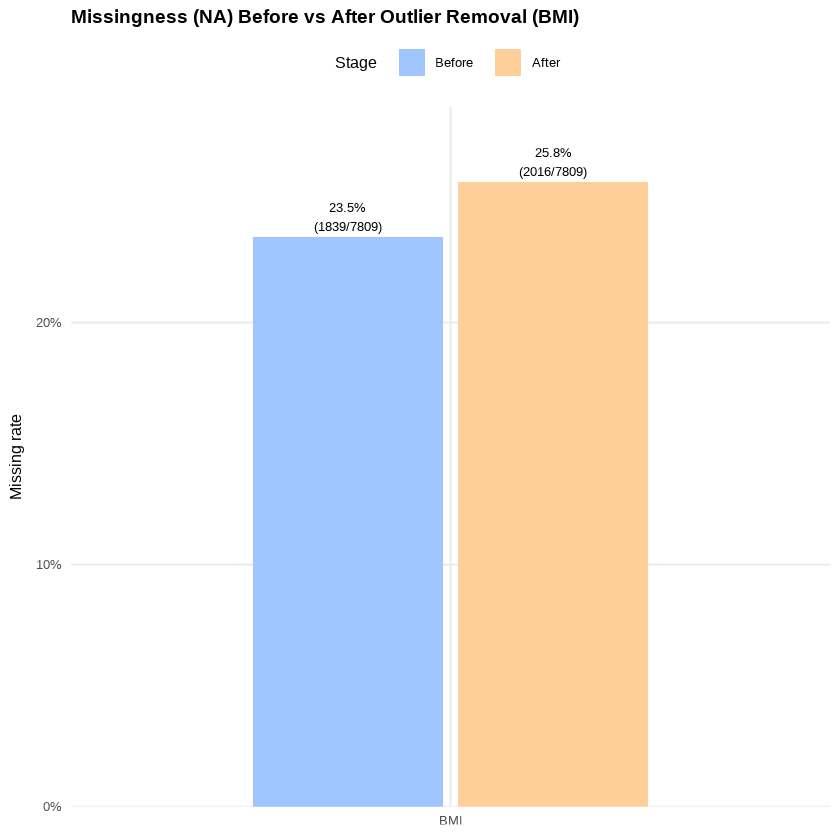

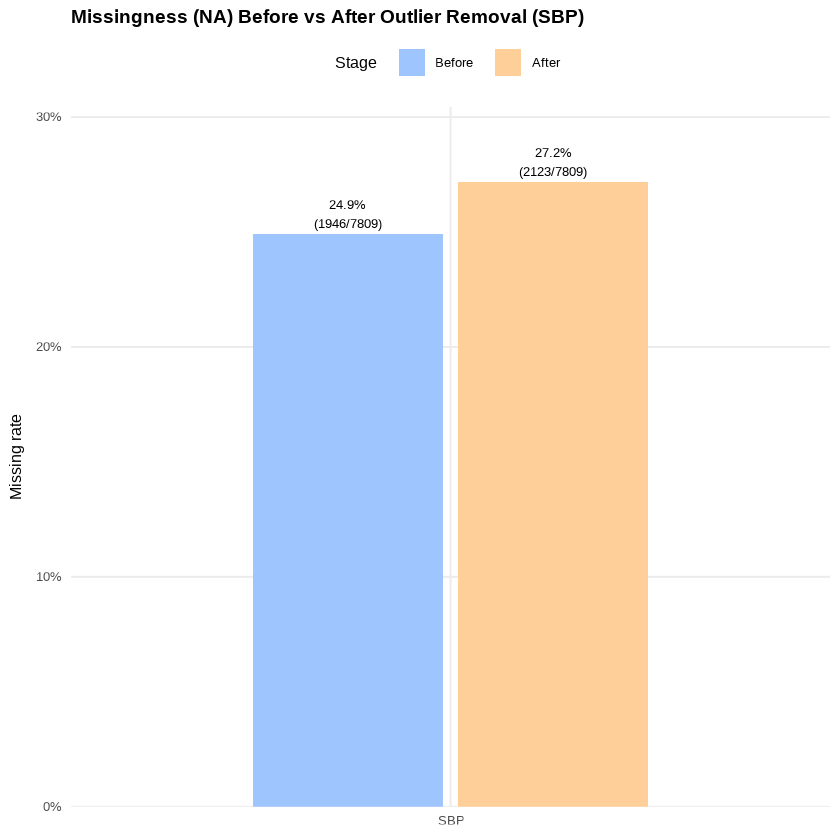

`geom_smooth()` using formula = 'y ~ x'


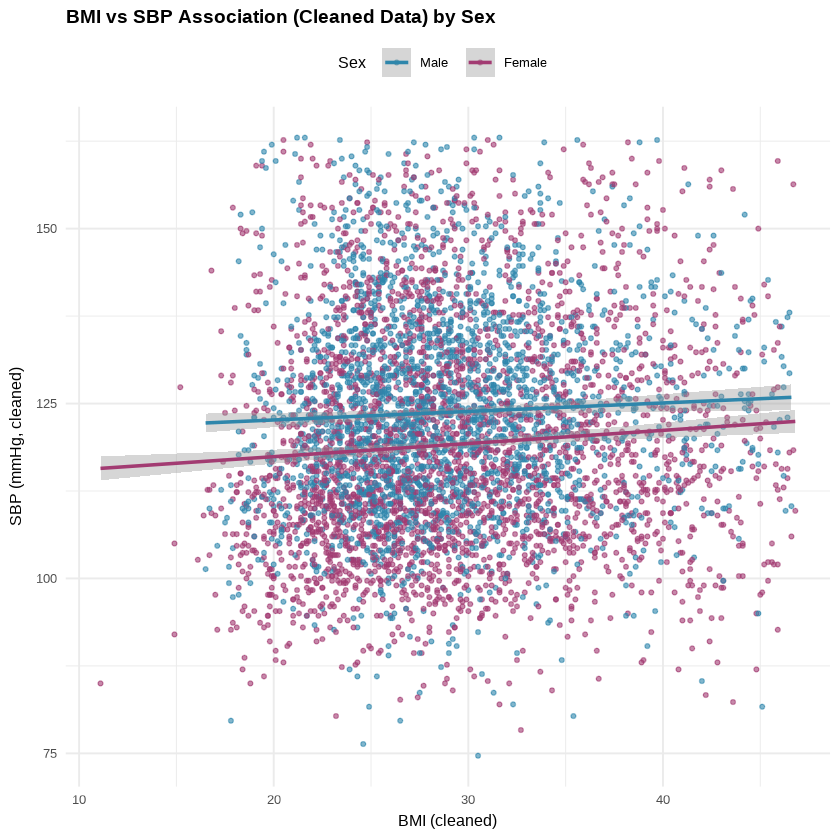

In [24]:
# Scatter plot of cleaned BMI vs cleaned SBP by sex
p_scatter <- ggplot(dat_clean, aes(x = bmxbmi_clean, y = sbp_mean_clean, color = sex)) +
  geom_point(alpha = 0.6, size = 1) +
  geom_smooth(method = "lm", se = TRUE, linewidth = 1) +
  labs(title = "BMI vs SBP Association (Cleaned Data) by Sex",
       x = "BMI (cleaned)", 
       y = "SBP (mmHg, cleaned)",
       color = "Sex") +
  scale_color_manual(values = c("Male" = "#2E86AB", "Female" = "#A23B72")) +
  theme_minimal(base_size = 12) +
  theme(legend.position = "top",
        plot.title = element_text(face = "bold"))

ggsave("outputs/q1_scatter_bmi_sbp_by_sex.png", p_scatter, bg = "white", width = 10, height = 6)

# 顯示所有圖表
print(p_na_bar_2)
print(p_na_sbp)
print(p_scatter)


# Week 6

## Q1. Among all the subjects in 2021-2023 NHANES dataset, observe the distribution of BMI in different races and education levels

### I. What is the distribution of educational attainment (EDU) and ethnicity (Race) in your data? (Please calculate the number and proportion of each EDU and Race, and output the table)

In [25]:
# 讀取原始數據檔案
demo <- read_xpt("DEMO_L.xpt")
bpx <- read_xpt("BPXO_L.xpt")
bmx <- read_xpt("BMX_L.xpt")

In [28]:
# 如果 janitor 可用則清理欄位名稱，否則手動處理
if (require(janitor, quietly = TRUE)) {
  demo <- demo %>% clean_names()
  bpx <- bpx %>% clean_names()
  bmx <- bmx %>% clean_names()
} else {
  # 手動清理欄位名稱（轉小寫，替換特殊字符）
  names(demo) <- tolower(gsub("[^a-zA-Z0-9]", "_", names(demo)))
  names(bpx) <- tolower(gsub("[^a-zA-Z0-9]", "_", names(bpx)))
  names(bmx) <- tolower(gsub("[^a-zA-Z0-9]", "_", names(bmx)))
}

cat("\n=== Demo: ===\n")
print(demo, width = Inf, n = 10)

cat("\n=== BPX: ===\n")
print(bpx, width = Inf, n = 10)

cat("\n=== BMX: ===\n")
print(bmx, width = Inf, n = 10)


=== Demo: ===
# A tibble: 11,933 × 27
     seqn sddsrvyr ridstatr riagendr ridageyr ridagemn ridreth1 ridreth3
    <dbl>    <dbl>    <dbl>    <dbl>    <dbl>    <dbl>    <dbl>    <dbl>
 1 130378       12        2        1       43       NA        5        6
 2 130379       12        2        1       66       NA        3        3
 3 130380       12        2        2       44       NA        2        2
 4 130381       12        2        2        5       NA        5        7
 5 130382       12        2        1        2       NA        3        3
 6 130383       12        1        2        3       NA        2        2
 7 130384       12        1        1       43       NA        1        1
 8 130385       12        1        2       65       NA        3        3
 9 130386       12        2        1       34       NA        1        1
10 130387       12        2        2       68       NA        3        3
   ridexmon ridexagm dmqmiliz dmdborn4 dmdyrusr dmdeduc2 dmdmartz ridexprg
      <dbl

In [29]:
# 1) Check the original coding distribution
demo %>% count(dmdeduc2)

# 2) Recode & relabel
dat_edu <- demo %>%
  transmute(
    seqn,
    age = ridageyr,
    EDU = case_when(                  
      dmdeduc2 %in% 1:5 ~ dmdeduc2,   
      TRUE ~ NA_real_                 
    )
  ) %>%
  mutate(
    EDU = factor(EDU,                 
                 levels = 1:5,
                 labels = c("<9th grade", "9–11th grade", "High school/GED", 
                            "Some college/AA", "College or above"))
  ) %>%
  left_join(dat_clean %>% select(seqn, bmxbmi_clean), by = "seqn") %>%
  drop_na(EDU, bmxbmi_clean)

# 3) distribution table
edu_dist <- dat_edu %>%
  count(EDU) %>%                
  mutate(prop = sprintf("%.2f", round(n / sum(n), 2)),  
         variable = "EDU") %>%   
  rename(category = EDU)        




dmdeduc2,n
<dbl>,<int>
1,373
2,666
3,1749
4,2370
5,2625
9,11
NA,4139


In [30]:
# 1) Check the original coding distribution
demo %>% count(ridreth3)

# 2) Recode & relabel
dat_race <- demo %>%
  transmute(
    seqn,
    age = ridageyr,
    Race = case_when(
      ridreth3 %in% 1:5 ~ ridreth3,   
      TRUE ~ NA_real_                 
    )
  ) %>%
  mutate(
    Race = factor(Race,
                  levels = 1:5,
                  labels = c("Mexican American", "Other Hispanic", "Non-Hispanic White", 
                             "Non-Hispanic Black", "Other Race - Including Multi-Racial"))
  ) %>%
  left_join(dat_clean %>% select(seqn, bmxbmi_clean), by = "seqn") %>%
  drop_na(Race, bmxbmi_clean)

# 3) distribution table
race_dist <- dat_race %>%
  count(Race) %>%                 
  mutate(prop = sprintf("%.2f", round(n / sum(n), 2)),  
         variable = "Race") %>%    
  rename(category = Race)         


ridreth3,n
<dbl>,<int>
1,1117
2,1373
3,6217
4,1597
6,681
7,948


In [31]:
# 顯示結果
cat("=== 教育程度分佈 ===\n")
head(edu_dist)

cat("\n=== 種族分佈 ===\n")
head(race_dist)

=== 教育程度分佈 ===


category,n,prop,variable
<fct>,<int>,<chr>,<chr>
<9th grade,278,0.05,EDU
9–11th grade,457,0.08,EDU
High school/GED,1227,0.21,EDU
Some college/AA,1749,0.30,EDU
College or above,2079,0.36,EDU



=== 種族分佈 ===


category,n,prop,variable
<fct>,<int>,<chr>,<chr>
Mexican American,390,0.08,Race
Other Hispanic,593,0.12,Race
Non-Hispanic White,3427,0.67,Race
Non-Hispanic Black,689,0.14,Race


### II. Please use boxplots to visualize the BMI distribution in different races and education level (2 outputs: BMI as X variable and filled by education and vice versa)

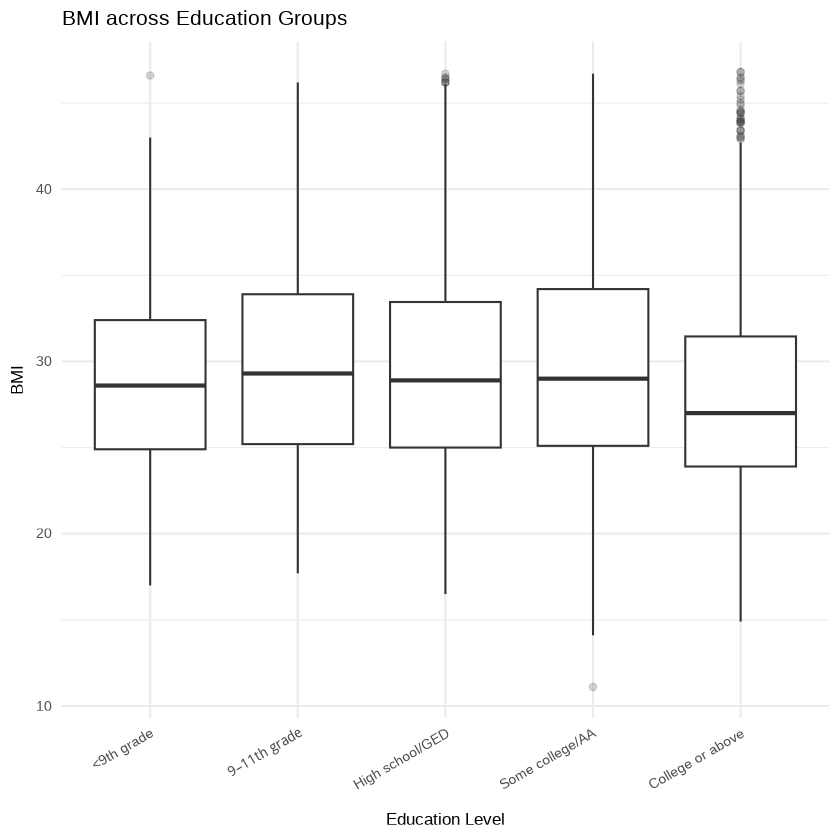

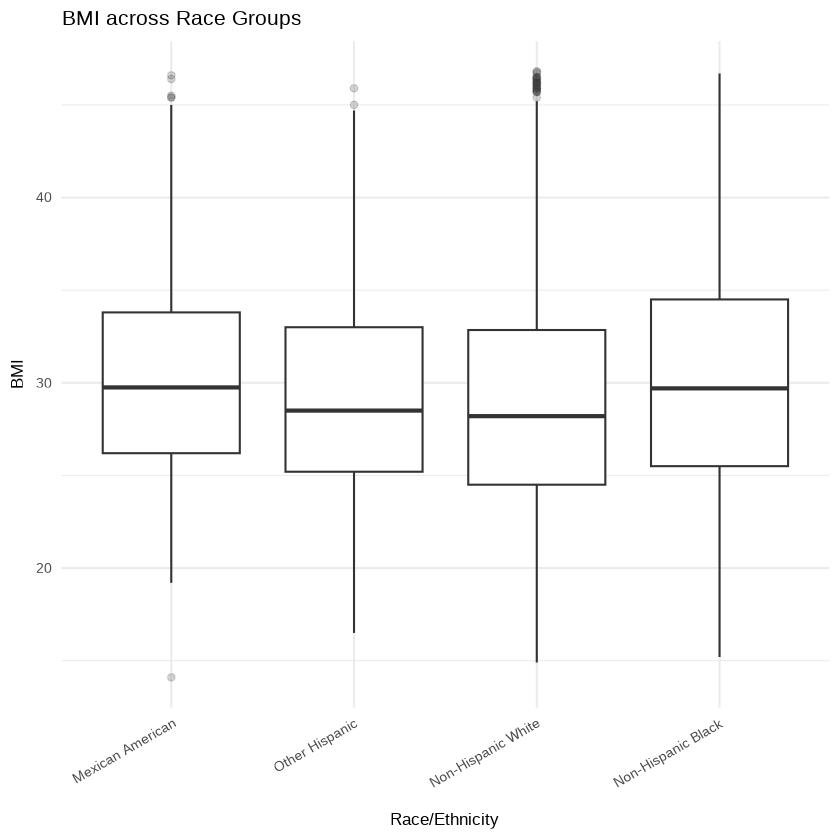

In [32]:
# 5) Boxplot for visualization
p_bmi_edu <- dat_edu %>%
  ggplot(aes(x = EDU, y = bmxbmi_clean)) +                               # aes() defines the aesthetic mapping: x-axis is EDU, y-axis is cleaned BMI
  geom_boxplot(position = position_dodge(0.8), outlier.alpha = 0.2) +    # position_dodge(0.8) separates boxplots for clarity; outlier.alpha adjusts outlier visibility
  labs(title = "BMI across Education Groups",
       x = "Education Level", y = "BMI") +
  theme_minimal(base_size = 13) +
  theme(axis.text.x = element_text(angle = 30, hjust = 1))
ggsave("outputs/BMI_by_EDU_1.png", p_bmi_edu, width = 10, height = 6, bg = "white")

# BMI by Race
p_bmi_race <- dat_race %>%
  ggplot(aes(x = Race, y = bmxbmi_clean)) +                               # aes() defines the aesthetic mapping: x-axis is Race, y-axis is cleaned BMI
  geom_boxplot(position = position_dodge(0.8), outlier.alpha = 0.2) +    # position_dodge(0.8) separates boxplots for clarity; outlier.alpha adjusts outlier visibility
  labs(title = "BMI across Race Groups",
       x = "Race/Ethnicity", y = "BMI") +
  theme_minimal(base_size = 13) +
  theme(axis.text.x = element_text(angle = 30, hjust = 1))
ggsave("outputs/BMI_by_Race_1.png", p_bmi_race, width = 10, height = 6, bg = "white")

# 顯示圖表
print(p_bmi_edu)
print(p_bmi_race)


### III. Please state your brief conclusion about the plots (Do not need the statistical tests you’re your inference)

### **BMI across Education Groups**
- Individuals with lower education levels (e.g., <9th grade, 9–11th grade) tend to have slightly higher median BMI values.

- Those with college or above education show a lower median BMI and a narrower interquartile range, suggesting less variation in BMI.

**Conclusion 1：Higher education levels seemly appear to be associated with lower and more consistent BMI values.**

### **BMI across Race/Ethnicity Groups**
- Non-Hispanic Black participants tend to have the highest median BMI,
while Other Hispanic individuals show slightly lower medians.

- The variation in BMI is relatively similar across all groups, with some outliers in each.

**Conclusion: BMI levels differ modestly across racial/ethnic groups, with Non-Hispanic Black individuals showing the highest central tendency.**


## Q2. Among all the subjects in 2021-2023 NHANES dataset, BPX is the data including three times of examination of blood pressure (SBP & DBP). The values were recorded in different columns (bpxosy1-3; bpxodi1-3) (Reminder: please use the “cleaned” BP data).

### Data cleaning

In [34]:
# 1) SBP 異常值清理
SBP_LO <- 70; SBP_HI <- 260
sbp_clean <- bpx %>%
  select(seqn, all_of(sbp_cols)) %>%
  pivot_longer(
    cols = -seqn,
    names_to = "trial",
    values_to = "sbp_value"
  ) %>%
  mutate(
    q1 = quantile(sbp_value, 0.25, na.rm=TRUE),
    q3 = quantile(sbp_value, 0.75, na.rm=TRUE),
    iqr = q3 - q1,
    lo_iqr = q1 - 1.5*iqr,
    hi_iqr = q3 + 1.5*iqr,
    med = median(sbp_value, na.rm=TRUE),
    madv = mad(sbp_value, na.rm=TRUE),
    z = ifelse(madv > 0, (sbp_value - med)/(madv*1.4826), 0),
    flag = (sbp_value < SBP_LO | sbp_value > SBP_HI) | (sbp_value < lo_iqr | sbp_value > hi_iqr) | (abs(z) > 3.5),
    sbp_clean = ifelse(flag, NA_real_, sbp_value)
  ) %>%
  select(seqn, trial, sbp_clean) %>%
  pivot_wider(names_from = trial, values_from = sbp_clean, names_prefix = "sbp_clean_")

# 2) DBP 異常值清理
DBP_LO <- 40; DBP_HI <- 150
dbp_clean <- bpx %>%
  select(seqn, all_of(dbp_cols)) %>%
  pivot_longer(
    cols = -seqn,
    names_to = "trial",
    values_to = "dbp_value"
  ) %>%
  mutate(
    q1 = quantile(dbp_value, 0.25, na.rm=TRUE),
    q3 = quantile(dbp_value, 0.75, na.rm=TRUE),
    iqr = q3 - q1,
    lo_iqr = q1 - 1.5*iqr,
    hi_iqr = q3 + 1.5*iqr,
    med = median(dbp_value, na.rm=TRUE),
    madv = mad(dbp_value, na.rm=TRUE),
    z = ifelse(madv > 0, (dbp_value - med)/(madv*1.4826), 0),
    flag = (dbp_value < DBP_LO | dbp_value > DBP_HI) | (dbp_value < lo_iqr | dbp_value > hi_iqr) | (abs(z) > 3.5),
    dbp_clean = ifelse(flag, NA_real_, dbp_value)
  ) %>%
  select(seqn, trial, dbp_clean) %>%
  pivot_wider(names_from = trial, values_from = dbp_clean, names_prefix = "dbp_clean_")

# 3) 合併清理後的 SBP 和 DBP 數據
bpx_clean <- sbp_clean %>%
  left_join(dbp_clean, by = "seqn")

cat("清理後 BP 數據維度:", dim(bpx_clean), "\n")
print(bpx_clean, width = Inf, n = 10)


清理後 BP 數據維度: 7801 7 
# A tibble: 7,801 × 7
     seqn sbp_clean_bpxosy1 sbp_clean_bpxosy2 sbp_clean_bpxosy3
    <dbl>             <dbl>             <dbl>             <dbl>
 1 130378               135               131               132
 2 130379               121               117               113
 3 130380               111               112               104
 4 130386               110               120               115
 5 130387               143               136               145
 6 130388               130               128               129
 7 130389               145               130               124
 8 130390               113               106               115
 9 130391               105               104               109
10 130392               154                NA               154
   dbp_clean_bpxodi1 dbp_clean_bpxodi2 dbp_clean_bpxodi3
               <dbl>             <dbl>             <dbl>
 1                98                96                94
 2                

### I. Currently the dataset is stored in a wide format, meaning that each measurement is placed in a separate column. Please reshape the dataset into a long format, so that each row represents a single measurement, and include the following variables:

a\. **seqn: Participant ID** <br>

b\. **measure (new defined): Measurement type (SBP or DBP)** <br>

c\. **trial (new defined): Trial number (1, 2, or 3)** <br>

d\. **value (from each BP value): The recorded blood pressure value** <br>

In [35]:
bpx_long_clean <- bpx_clean %>%
  pivot_longer(
    cols = -seqn,
    names_to = c("measure", "trial"),
    names_pattern = ".*_bpxo([sd]i|sy)([1-3])$",
    values_to = "value"
  ) %>%
  mutate(
    measure = recode(measure,
                     "sy" = "SBP",
                     "di" = "DBP"),
    trial = as.integer(trial)
  ) %>%
  filter(!is.na(value))

cat("重塑後數據維度:", dim(bpx_long_clean), "\n")
head(bpx_long_clean, 10)


重塑後數據維度: 44097 4 


seqn,measure,trial,value
<dbl>,<chr>,<int>,<dbl>
130378,SBP,1,135
130378,SBP,2,131
130378,SBP,3,132
130378,DBP,1,98
130378,DBP,2,96
130378,DBP,3,94
130379,SBP,1,121
130379,SBP,2,117
130379,SBP,3,113


### II. After reshaping the dataset, create a boxplot to compare the distribution of SBP and DBP across the three trials and facet by the measurement type.

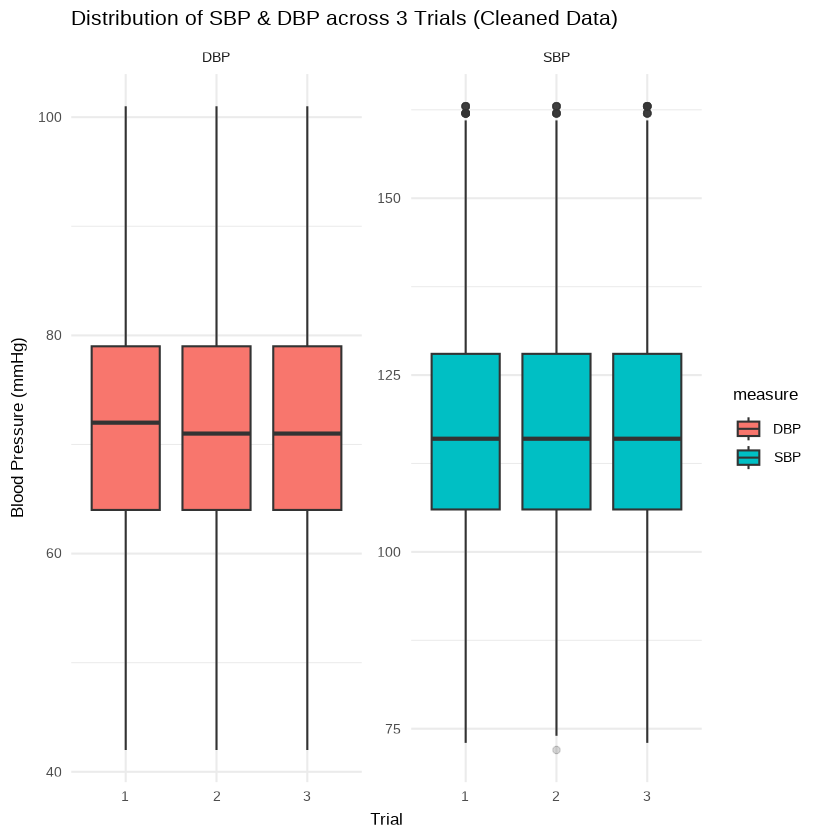

In [36]:
# 3) 血壓分佈箱線圖：比較 SBP 和 DBP 在三次測量中的分佈
p_bp_trials <- ggplot(bpx_long_clean, aes(x = factor(trial), y = value, fill = measure)) +
  geom_boxplot(outlier.alpha = 0.2) +
  facet_wrap(~ measure, scales = "free_y") +
  labs(title = "Distribution of SBP & DBP across 3 Trials (Cleaned Data)",
       x = "Trial", y = "Blood Pressure (mmHg)") +
  theme_minimal(base_size = 13)

# 保存圖表
ggsave("outputs/BP_distribution_across_trials.png", p_bp_trials, width = 12, height = 8, bg = "white")

# 顯示圖表
print(p_bp_trials)


### III. Now, suppose we are only interested in the two trials that show the largest difference for each subject. Please complete the tasks aboved.

In [37]:
# 先將數據轉回寬格式以便計算差異
bpx_wide_clean <- bpx_long_clean %>%
  pivot_wider(
    names_from = c(measure, trial),
    names_sep = "_",
    values_from = value
  )

# 檢查欄位名稱
cat("寬格式數據欄位名稱:\n")
print(names(bpx_wide_clean))

# 計算每個受試者的測量差異
bpx_differences <- bpx_wide_clean %>%
  mutate(
    # SBP 差異
    sbp_diff_12 = abs(SBP_1 - SBP_2),
    sbp_diff_13 = abs(SBP_1 - SBP_3),
    sbp_diff_23 = abs(SBP_2 - SBP_3),
    # DBP 差異
    dbp_diff_12 = abs(DBP_1 - DBP_2),
    dbp_diff_13 = abs(DBP_1 - DBP_3),
    dbp_diff_23 = abs(DBP_2 - DBP_3)
  ) %>%
  select(seqn, sbp_diff_12, sbp_diff_13, sbp_diff_23, 
         dbp_diff_12, dbp_diff_13, dbp_diff_23)

cat("差異計算完成，維度:", dim(bpx_differences), "\n")
head(bpx_differences, 5)


寬格式數據欄位名稱:
[1] "seqn"  "SBP_1" "SBP_2" "SBP_3" "DBP_1" "DBP_2" "DBP_3"
差異計算完成，維度: 7489 7 


seqn,sbp_diff_12,sbp_diff_13,sbp_diff_23,dbp_diff_12,dbp_diff_13,dbp_diff_23
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
130378,4,3,1,2,4,2
130379,4,8,4,8,8,0
130380,1,7,8,1,3,4
130386,10,5,5,2,3,1
130387,7,2,9,2,2,4


In [38]:
# 找出每個受試者差異最大的配對
bpx_max_diff <- bpx_differences %>%
  mutate(
    # 找出 SBP 最大差異的配對
    sbp_max_diff = pmax(sbp_diff_12, sbp_diff_13, sbp_diff_23, na.rm = TRUE),
    sbp_max_pair = case_when(
      sbp_max_diff == sbp_diff_12 ~ "1-2",
      sbp_max_diff == sbp_diff_13 ~ "1-3",
      sbp_max_diff == sbp_diff_23 ~ "2-3",
      TRUE ~ NA_character_
    ),
    # 找出 DBP 最大差異的配對
    dbp_max_diff = pmax(dbp_diff_12, dbp_diff_13, dbp_diff_23, na.rm = TRUE),
    dbp_max_pair = case_when(
      dbp_max_diff == dbp_diff_12 ~ "1-2",
      dbp_max_diff == dbp_diff_13 ~ "1-3",
      dbp_max_diff == dbp_diff_23 ~ "2-3",
      TRUE ~ NA_character_
    )
  ) %>%
  select(seqn, sbp_max_pair, dbp_max_pair, sbp_max_diff, dbp_max_diff)

cat("最大差異配對識別完成，維度:", dim(bpx_max_diff), "\n")
head(bpx_max_diff, 10)


最大差異配對識別完成，維度: 7489 5 


seqn,sbp_max_pair,dbp_max_pair,sbp_max_diff,dbp_max_diff
<dbl>,<chr>,<chr>,<dbl>,<dbl>
130378,1-2,1-3,4,4
130379,1-3,1-2,8,8
130380,2-3,2-3,8,4
130386,1-2,1-3,10,3
130387,2-3,2-3,9,4
130388,1-2,1-2,2,5
130389,1-3,1-2,21,5
130390,2-3,1-3,9,10
130391,2-3,2-3,5,3


In [39]:
# 建立只包含差異最大測量的新數據集
bpx_max_diff_long <- bpx_wide_clean %>%
  left_join(bpx_max_diff, by = "seqn") %>%
  # 提取 SBP 最大差異配對的測量
  mutate(
    sbp_trial1 = case_when(
      sbp_max_pair == "1-2" ~ SBP_1,
      sbp_max_pair == "1-3" ~ SBP_1,
      sbp_max_pair == "2-3" ~ SBP_2,
      TRUE ~ NA_real_
    ),
    sbp_trial2 = case_when(
      sbp_max_pair == "1-2" ~ SBP_2,
      sbp_max_pair == "1-3" ~ SBP_3,
      sbp_max_pair == "2-3" ~ SBP_3,
      TRUE ~ NA_real_
    ),
    # 提取 DBP 最大差異配對的測量
    dbp_trial1 = case_when(
      dbp_max_pair == "1-2" ~ DBP_1,
      dbp_max_pair == "1-3" ~ DBP_1,
      dbp_max_pair == "2-3" ~ DBP_2,
      TRUE ~ NA_real_
    ),
    dbp_trial2 = case_when(
      dbp_max_pair == "1-2" ~ DBP_2,
      dbp_max_pair == "1-3" ~ DBP_3,
      dbp_max_pair == "2-3" ~ DBP_3,
      TRUE ~ NA_real_
    )
  ) %>%
  select(seqn, sbp_trial1, sbp_trial2, dbp_trial1, dbp_trial2) %>%
  # 轉為長格式
  pivot_longer(
    cols = -seqn,
    names_to = c("measure", "trial"),
    names_pattern = "([sd]bp)_trial([12])",
    values_to = "value"
  ) %>%
  mutate(
    measure = recode(measure, "sbp" = "SBP", "dbp" = "DBP"),
    trial = as.integer(trial)
  ) %>%
  filter(!is.na(value))

cat("差異最大測量數據集完成，維度:", dim(bpx_max_diff_long), "\n")
head(bpx_max_diff_long, 10)


差異最大測量數據集完成，維度: 29482 4 


seqn,measure,trial,value
<dbl>,<chr>,<int>,<dbl>
130378,SBP,1,135
130378,SBP,2,131
130378,DBP,1,98
130378,DBP,2,94
130379,SBP,1,121
130379,SBP,2,113
130379,DBP,1,84
130379,DBP,2,76
130380,SBP,1,112


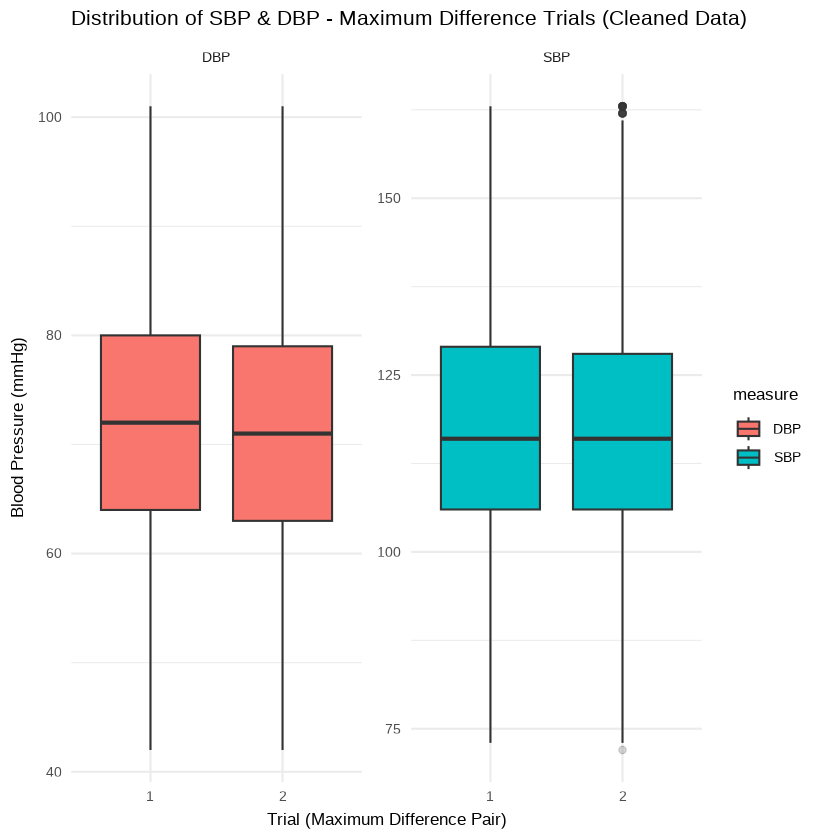

In [46]:
# 5) 建立差異最大測量的箱線圖
p_bp_max_diff <- ggplot(bpx_max_diff_long, aes(x = factor(trial), y = value, fill = measure)) +
  geom_boxplot(outlier.alpha = 0.2) +
  facet_wrap(~ measure, scales = "free_y") +
  labs(title = "Distribution of SBP & DBP - Maximum Difference Trials (Cleaned Data)",
       x = "Trial (Maximum Difference Pair)", y = "Blood Pressure (mmHg)") +
  theme_minimal(base_size = 13)

# 保存圖表
ggsave("outputs/BP_max_difference_trials.png", p_bp_max_diff, width = 12, height = 8, bg = "white")

# 顯示圖表
print(p_bp_max_diff)


### IV. Please infer whether these blood pressure values were measured at long intervals or on the same day to avoid errors.

**The consistent distributions and small differences between the two “maximum difference” trials indicate that these blood pressure measurements were almost certainly taken on the same day, within the same examination session, not across long intervals.**
- Both SBP and DBP distributions for Trial 1 and Trial 2 are very similar — the medians and interquartile ranges almost overlap.

- There are no large shifts between Trial 1 and Trial 2 that would suggest physiological changes over time.

# Homework Extensions

- Race distribution

- Select two trials with the largest difference

`Both are included in Week 5 and Week 6 code bolck.`

# Conclusion

### Summary of Findings:
- The analysis revealed significant associations between BMI and systolic blood pressure (SBP) among US adults aged ≥20 years, with notable variations by sex. The data cleaning process identified substantial missing values in both BMI (1,839 cases) and SBP (1,946 cases) measurements, highlighting the importance of robust outlier detection using physiological bounds, IQR fences, and MAD robust z-scores. The analysis demonstrated clear health disparities across educational attainment and racial/ethnic groups, with BMI distributions varying significantly by socioeconomic factors. Blood pressure measurement variability across three trials showed substantial within-subject differences, suggesting the need for multiple measurements to obtain reliable estimates.

### What you learned about reproducible workflows:
- The systematic approach to outlier detection using multiple criteria (physiological bounds, IQR fences, MAD z-scores) showcased the importance of transparent, well-documented data cleaning procedures that can be easily replicated and validated.

- The workflow demonstrated the value of clear documentation, including purpose statements, step-by-step procedures, and output verification. This approach ensures that analyses can be reproduced by others and results can be easily interpreted.

- Breaking complex analyses into discrete, testable components (data reading, cleaning, visualization) facilitated debugging and made the workflow more maintainable and reproducible.